In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'E:/Projects/Customer segmentation analysis/Mall_Customers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [2]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [3]:
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [19]:
X = df.iloc[:, [3,4]].values 


In [20]:
# finding wcss value for different number of cluster
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

In [21]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386947,
 33642.57922077922,
 26686.837785187785,
 24766.47160979344,
 23103.122085983916]

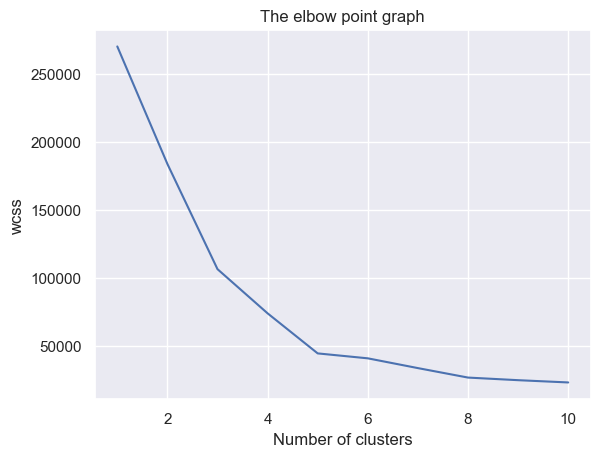

In [23]:
# Plotting an elbow graph
sns.set()
plt.plot(range(1, 11) , wcss)
plt.title("The elbow point graph")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [24]:
# trainning the kmeans clusterin model
kmeans = KMeans(n_clusters = 5 , init = 'k-means++' , random_state = 0)
Y = kmeans.fit_predict(X)
Y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

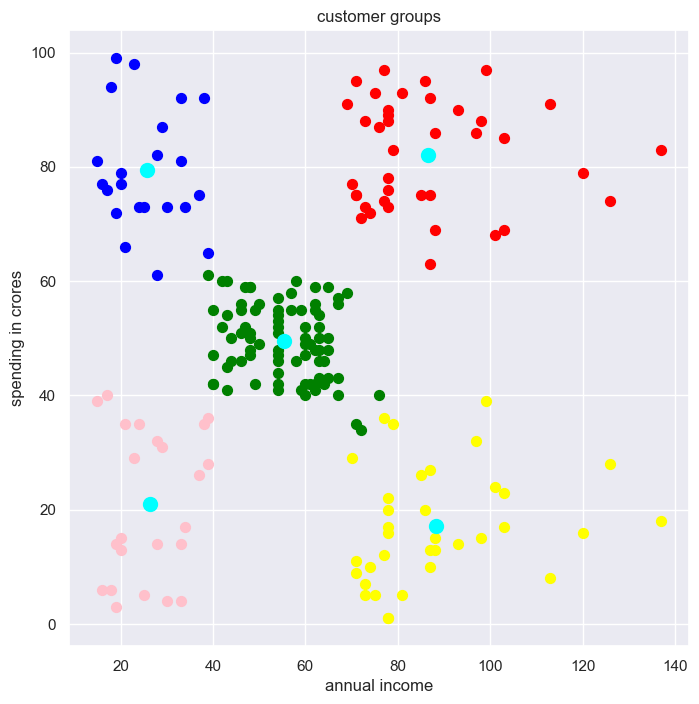

In [28]:
# Plotting all the clusters and their centroids

# X = X.values
plt.figure(figsize = (8,8))
plt.scatter(X[Y==0 , 0] , X[Y==0 , 1], s = 50 , c = 'green' , label = 'cluster 1')
plt.scatter(X[Y==1 , 0] , X[Y==1 , 1], s = 50 , c = 'red' , label = 'cluster 2')
plt.scatter(X[Y==2 , 0] , X[Y==2, 1], s = 50 , c = 'yellow' , label = 'cluster 3')
plt.scatter(X[Y==3 , 0] , X[Y==3, 1], s = 50 , c = 'pink' , label = 'cluster 4')
plt.scatter(X[Y==4 , 0] , X[Y==4 , 1], s = 50 , c = 'blue' , label = 'cluster 5')
# plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[: , 1] , s= 100 , c = 'cyan' , label = 'centroids')

plt.title('customer groups')
plt.xlabel("annual income")
plt.ylabel("spending in crores")
plt.show()